# Project Objective

The goal of this project is to leverage Airbnb data to conduct a comprehensive analysis of user behavior, listing characteristics, and the effectiveness of marketing strategies. Specifically, the analysis focuses on:

## Funnel Analysis
Understanding the user journey through key stages—searching, viewing listings, adding to wishlists, and booking. By analyzing conversion rates and drop-offs at each stage, we can identify opportunities to optimize the user experience and improve overall booking rates.

## A/B Testing
Evaluating the impact of discounted pricing on booking behavior. By dividing users into control (original pricing) and treatment (discounted pricing) groups, we aim to determine whether offering discounts increases the booking rate and revenue.

## User Segmentation
Grouping users based on their demographic and behavioral characteristics (e.g., age, gender, device type, booking frequency) to classify them into distinct user personas. These personas can inform targeted marketing strategies and personalized recommendations.

## Listing Classification
Analyzing listing features such as location, price, occupancy rate, quality scores, and amenities to group listings into meaningful categories. These classifications can be used to create filters for users, making it easier for them to find listings aligned with their preferences and increasing the likelihood of conversion.


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import GofChisquarePower
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [56]:
users = pd.read_csv("/Users/andreaseet/Downloads/Data Science/Airbnb/airbnb_users.csv")
listings = pd.read_csv("/Users/andreaseet/Downloads/Data Science/Airbnb/airbnb_listings.csv")
events = pd.read_csv("/Users/andreaseet/Downloads/Data Science/Airbnb/airbnb_events.csv")
bookings = pd.read_csv("/Users/andreaseet/Downloads/Data Science/Airbnb/airbnb_bookings.csv")

In [57]:
events

,Unnamed: 0,event_id,user_id,event_type,event_timestamp,listing_id,session_id
0,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29
1,4099.0,718f79bb-1eb7-4a10-8966-2fea40ea89b5,481cd3a7-3a17-4f73-a9dd-8c6bc48f7396,Search,6/7/24 21:08,96b21ad7-3280-42ac-af45-d8890fcd2af4,54676457-fcce-4ee0-b08c-f9a35fddc628
2,7206.0,9086eca1-377f-4f50-822c-c6f2d3678210,143f5ed9-7f37-43bf-a672-2687b2bbf6c0,Search,6/29/24 20:06,f0ab1ce4-ba0f-478a-bc11-e8463ed36d46,38e1f084-a209-41d9-b212-31c41ddcd512
3,1434.0,e4c8cb47-e8bc-4825-9812-81faa0de1dd8,2bf812e0-f1f9-4d9e-978c-c6b07c38102b,Search,7/20/24 15:06,f87e2b8b-c4a9-4cf4-9bf2-404d83b074c2,f907323c-a265-42f4-8044-29cf00e0301b
4,4494.0,731a9c54-5e36-4b01-ae48-5c49176346c5,80f82025-396f-4596-b842-dcb5fc59b16c,Search,8/16/24 13:35,5eb46618-8f47-4fe0-8da6-cd5b30094715,dd766f54-d3e4-403f-863f-b6ea809372d4
...,...,...,...,...,...,...,...
59801,NaN,missing_listing_event_5686,NaN,NaN,23:04.9,333324d0-6287-467d-936a-092e91334637,missing_session_5686
59802,NaN,missing_listing_event_5687,NaN,NaN,23:04.9,a9a8fc90-9c87-491d-9d19-5de5d71d7eea,missing_session_5687
59803,NaN,missing_listing_event_5688,NaN,NaN,23:04.9,30e067a3-f615-4431-a53e-f53aaa06d909,missing_session_5688
59804,NaN,missing_listing_event_5689,NaN,NaN,23:04.9,afc1be31-94af-4b2a-8a6c-290834173cc7,missing_session_5689


In [58]:
users

,user_id,signup_date,country,age,gender,device_type,avg_session_duration,num_bookings,preferred_listing_type,loyalty_status
0,e1186cb5-347c-4078-b3dc-b101fbbb4628,10/5/23,United States,25,Female,Tablet,58.82,1,Shared Room,Regular
1,aa919645-a250-4023-96c3-37f2a9bed56f,5/1/23,United States,25,Male,Tablet,50.93,1,Entire Place,New
2,ed313c17-c86e-4834-9cbc-f9d514ff9eca,4/29/24,United States,25,Male,Mobile,30.15,5,Shared Room,Regular
3,e6e4bf5d-884f-4aa2-b2ac-c59ed3005688,2/6/23,United States,25,Male,Tablet,23.08,1,Entire Place,New
4,933b32ce-3162-4e61-96b2-9f3f7b1bcabb,7/31/23,United States,25,Male,Mobile,28.43,2,Entire Place,Regular
...,...,...,...,...,...,...,...,...,...,...
49995,87e8b4f3-1523-4308-9076-8525dc54e7ce,3/20/23,United States,18,Female,Tablet,51.17,4,Private Room,Superhost
49996,1fe487b9-b6ba-4c2f-b07e-76577f1590ed,11/6/24,United States,18,Female,Desktop,24.65,0,Entire Place,Regular
49997,a87f1369-43e3-4f7b-b855-7b3a41d0741b,11/28/24,United States,18,Female,Tablet,35.87,2,Private Room,Superhost
49998,91d38f4b-8c63-4dad-8cdc-3d017fcfdee3,10/4/24,United States,18,Male,Desktop,30.53,2,Private Room,New


In [59]:
listings

,listing_id,host_id,location,occupancy_rate,review_quality_score,price_per_night,property_type,num_bedrooms,num_bathrooms,capacity,amenities,photos,is_superhost
0,04a39dd5-776c-4c13-a6a3-ef9f062bd8a7,7e65e363-26df-4ec0-9e18-676c212c73e9,South Renee,0.42,4.8,88.18,House,3,2,4,"Pet-Friendly, Washer, Air Conditioning",3,0
1,0432c6af-65aa-4ba5-871d-1657d7a7943c,9dce83d1-3975-4965-9fc1-25625ef3aecd,Lake Stephanie,0.27,4.0,462.90,Apartment,1,1,2,"Breakfast, Kitchen, Air Conditioning",7,0
2,5ffe7e71-3646-4942-a7e6-ffb3499d5995,410ff052-aa9c-44ba-87cf-1cd13d72addd,Milesfort,0.24,4.3,309.35,Villa,4,3,8,"Gym, Kitchen, Breakfast, Wi-Fi",13,0
3,7bed3fb2-dded-4dfa-abc8-444029a3ce2b,b7be1b07-071d-4bad-a540-85df4322648f,Alvarezmouth,0.95,2.2,469.01,House,5,1,2,"Free Parking, Dryer, TV, Pool",3,1
4,ea3f35d8-ac4c-4e42-85e1-e0fa38b968c6,afaf5f19-a853-4be8-9562-0cd112f2ae75,Barajasstad,0.35,2.8,475.53,Cottage,2,1,8,"Pool, Free Parking, Gym, TV, Wi-Fi",9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,75b22e9e-26ce-4200-a1c0-61ed5eae618a,44c61455-a379-4c20-8128-b8335dd6690f,Port Louis,0.74,4.5,114.62,Apartment,4,1,2,"Air Conditioning, Pet-Friendly, TV, Wi-Fi",7,1
49996,171160bc-e9c4-418f-b17d-69c31e2244d9,04a782a6-0047-4303-8ecf-49fb63a7f221,East Jerryland,0.81,4.1,192.33,Villa,2,2,8,"Dryer, Kitchen, Pet-Friendly, Air Conditioning",18,1
49997,f9fd53c5-2edb-46bf-8491-e29959180370,2d9fdfc5-6684-40d2-b9da-89a54fc95bab,Candacefurt,0.20,2.5,412.38,Villa,5,1,3,"Wi-Fi, Free Parking, Kitchen, Breakfast",12,1
49998,797d4129-956d-4cd6-95a3-003314de2e8f,bb330d31-9715-4882-b607-ac3da40eb9c2,New Loganshire,0.60,2.1,332.04,Apartment,5,2,3,"Washer, Pool, Air Conditioning, TV",6,1


# Data Cleaning

One-hot encoded amentities for categorizing the listings at a later step

In [60]:
# One-hot encode the amenities column
amenities_encoded = listings["amenities"].str.get_dummies(sep=", ")

# Add a prefix to the column names
amenities_encoded = amenities_encoded.add_prefix("amenity_")

# Normalize column names to be lowercase and replace spaces/hyphens with underscores
amenities_encoded.columns = amenities_encoded.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

# Combine with the original DataFrame
listings = pd.concat([listings.drop("amenities", axis=1), amenities_encoded], axis=1)


In [61]:
# Create age groups
users['age_group'] = pd.cut(users['age'], 
                            bins=[18, 29, 39, 49, 59, 69], 
                            labels=["18-29", "30-39", "40-49", "50-59", "60-69"])

# Group the number of bookings into specified categories
users['booking_group'] = pd.cut(users['num_bookings'], 
                                bins=[-1, 0, 1, 5, float('inf')], 
                                labels=["0", "1", "2-5", "6+"])


# Exploratory Analyses

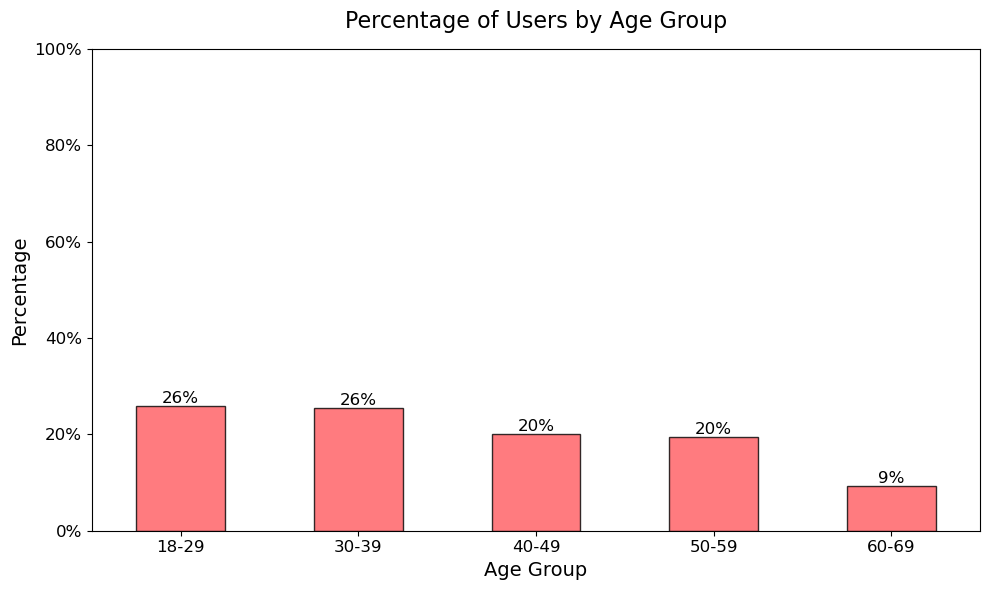

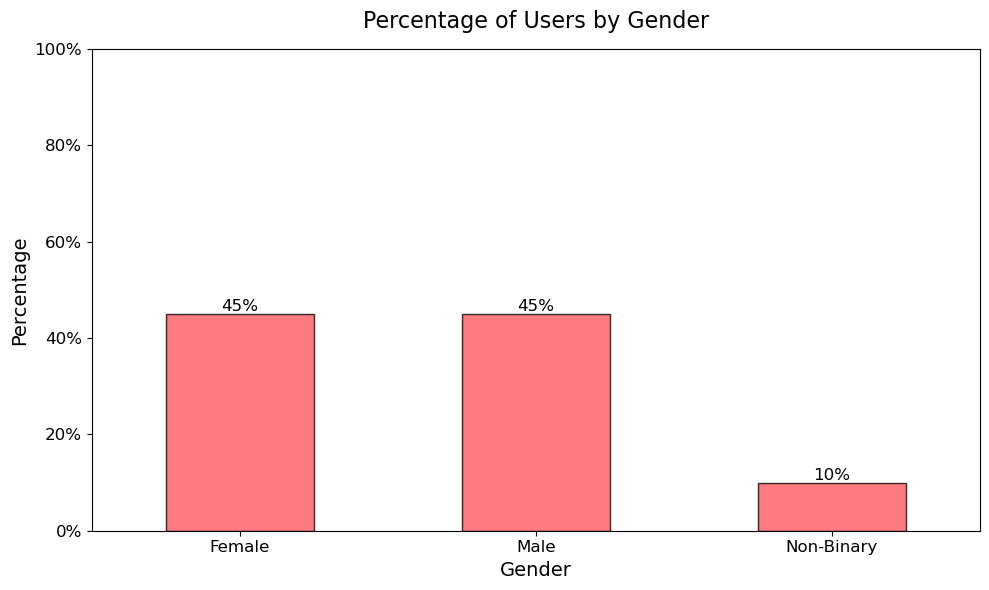

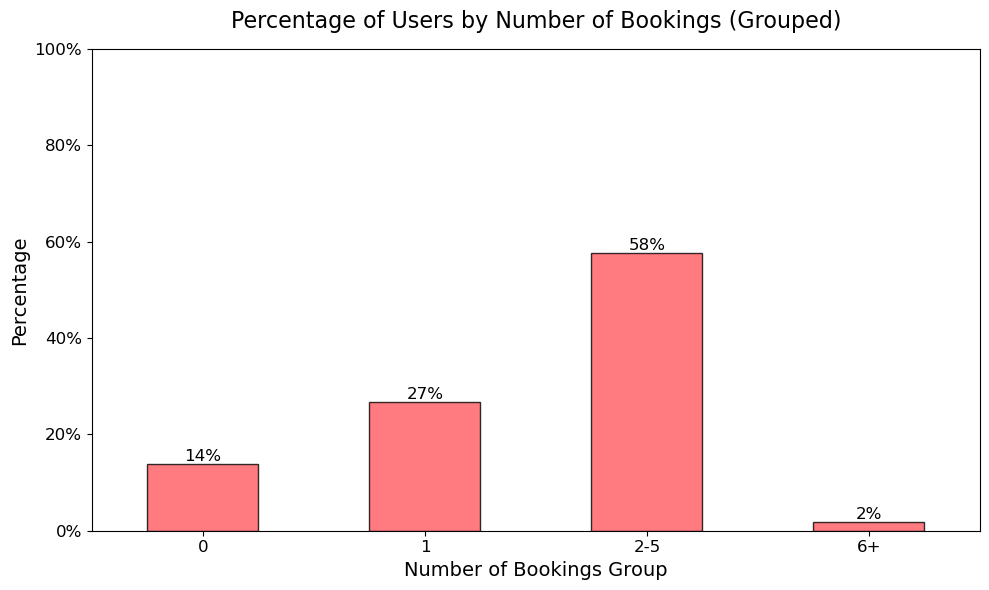

In [86]:


# Calculate percentages
age_group_percentages = users['age_group'].value_counts(normalize=True) * 100
gender_percentages = users['gender'].value_counts(normalize=True) * 100
booking_group_percentages = users['booking_group'].value_counts(normalize=True) * 100

# Function to plot percentages
def plot_percentages(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    bars = data.sort_index().plot(kind='bar', color='#ff5a5f', edgecolor='black', alpha=0.8)
    plt.title(title, fontsize=16, pad=15)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 100)
    
    # Format y-axis to show whole numbers with '%'
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{int(y)}%"))
    
    # Add percentages on the bars
    for bar in bars.patches:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{round(height)}%", 
                 ha='center', va='bottom', fontsize=12, color='black')
    
    plt.tight_layout()
    plt.show()

# Plot: Age Group Percentages
plot_percentages(age_group_percentages, "Percentage of Users by Age Group", "Age Group", "Percentage")

# Plot: Gender Percentages
plot_percentages(gender_percentages, "Percentage of Users by Gender", "Gender", "Percentage")

# Plot: Booking Group Percentages
plot_percentages(booking_group_percentages, "Percentage of Users by Number of Bookings (Grouped)", 
                 "Number of Bookings Group", "Percentage")

In [63]:
events

,Unnamed: 0,event_id,user_id,event_type,event_timestamp,listing_id,session_id
0,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29
1,4099.0,718f79bb-1eb7-4a10-8966-2fea40ea89b5,481cd3a7-3a17-4f73-a9dd-8c6bc48f7396,Search,6/7/24 21:08,96b21ad7-3280-42ac-af45-d8890fcd2af4,54676457-fcce-4ee0-b08c-f9a35fddc628
2,7206.0,9086eca1-377f-4f50-822c-c6f2d3678210,143f5ed9-7f37-43bf-a672-2687b2bbf6c0,Search,6/29/24 20:06,f0ab1ce4-ba0f-478a-bc11-e8463ed36d46,38e1f084-a209-41d9-b212-31c41ddcd512
3,1434.0,e4c8cb47-e8bc-4825-9812-81faa0de1dd8,2bf812e0-f1f9-4d9e-978c-c6b07c38102b,Search,7/20/24 15:06,f87e2b8b-c4a9-4cf4-9bf2-404d83b074c2,f907323c-a265-42f4-8044-29cf00e0301b
4,4494.0,731a9c54-5e36-4b01-ae48-5c49176346c5,80f82025-396f-4596-b842-dcb5fc59b16c,Search,8/16/24 13:35,5eb46618-8f47-4fe0-8da6-cd5b30094715,dd766f54-d3e4-403f-863f-b6ea809372d4
...,...,...,...,...,...,...,...
59801,NaN,missing_listing_event_5686,NaN,NaN,23:04.9,333324d0-6287-467d-936a-092e91334637,missing_session_5686
59802,NaN,missing_listing_event_5687,NaN,NaN,23:04.9,a9a8fc90-9c87-491d-9d19-5de5d71d7eea,missing_session_5687
59803,NaN,missing_listing_event_5688,NaN,NaN,23:04.9,30e067a3-f615-4431-a53e-f53aaa06d909,missing_session_5688
59804,NaN,missing_listing_event_5689,NaN,NaN,23:04.9,afc1be31-94af-4b2a-8a6c-290834173cc7,missing_session_5689


# Funnel Analysis

In [64]:
events['event_type'].value_counts()

Search             7263
View Listing       5810
Add to Wishlist    3050
Book               2251
Name: event_type, dtype: int64

In [65]:
# Ensure the funnel stages are in order: Search → View Listing → Add to Wishlist → Book
funnel_stages = ["Search", "View Listing", "Add to Wishlist", "Book"]

# Filter users at each stage sequentially to ensure proper progression
users_in_funnel = events[events['event_type'] == "Search"]['user_id'].unique()
funnel_counts_corrected = {}

for stage in funnel_stages:
    # Filter events to include only users from the previous stage
    stage_users = events[
        (events['event_type'] == stage) & 
        (events['user_id'].isin(users_in_funnel))
    ]['user_id'].unique()
    
    # Update the funnel users for the next stage
    users_in_funnel = stage_users
    funnel_counts_corrected[stage] = len(stage_users)

# Convert the corrected funnel counts into a DataFrame
funnel_df_corrected = pd.DataFrame(list(funnel_counts_corrected.items()), columns=["Stage", "Unique Users"])

# Calculate percentages relative to the first stage
funnel_df_corrected['Percentage'] = (funnel_df_corrected['Unique Users'] / funnel_df_corrected['Unique Users'].iloc[0]) * 100

# Round percentages for readability
funnel_df_corrected['Percentage'] = funnel_df_corrected['Percentage'].round(2)

# Display the corrected funnel data
funnel_df_corrected


,Stage,Unique Users,Percentage
0,Search,2050,100.00
1,View Listing,1854,90.44
2,Add to Wishlist,1345,65.61
3,Book,860,41.95


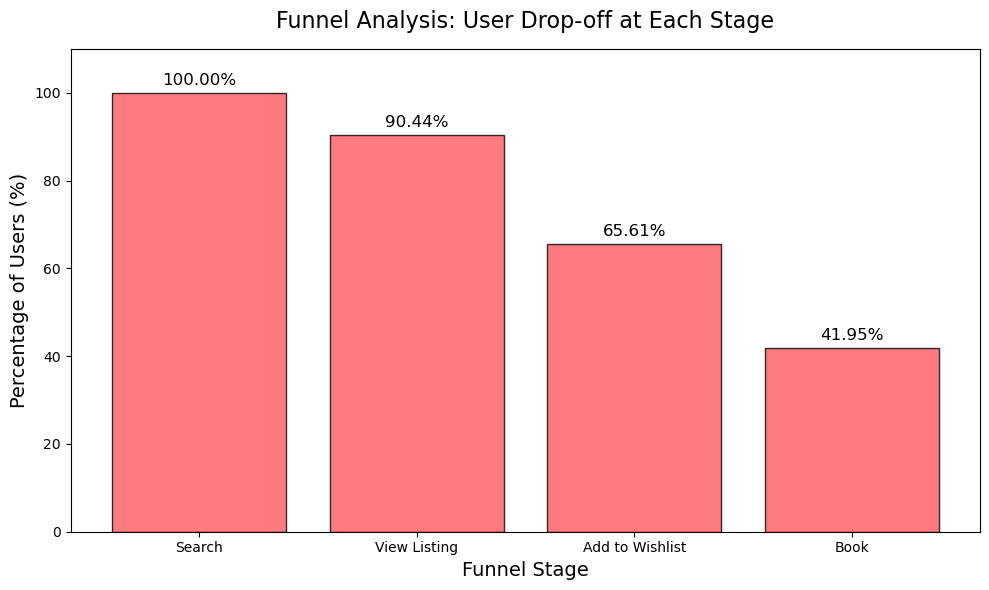

In [66]:

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(funnel_df_corrected['Stage'], funnel_df_corrected['Percentage'], color='#ff5a5f', edgecolor='black', alpha=0.8)
plt.xlabel('Funnel Stage', fontsize=14)
plt.ylabel('Percentage of Users (%)', fontsize=14)
plt.title('Funnel Analysis: User Drop-off at Each Stage', fontsize=16, pad=15)
plt.ylim(0, 110)  # Set y-axis limit slightly above 100 for better visibility of labels

# Adding percentage labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

**Search to View Listing**: A 66% conversion rate from search to viewing a listing demonstrates that a significant portion of users are engaged enough to explore specific listings, highlighting interest at the initial stages of the funnel.

**Add to Wishlist to Booking**: A 42% conversion rate from wishlist additions to bookings indicates that while users show intent by adding listings to their wishlists, fewer ultimately convert this interest into an actual booking.


# Discount Effect On Revenue A/B Test

Next, to increase the conversation rates from View Listing to Book, we want to explore whether discounts increase bookings.

In [67]:
# Parameters for power analysis
effect_size = 0.5  # effect size
alpha = 0.05       # Significance level
power = 0.80       # Desired power
ratio = 1.0       # Ratio of sample sizes in the two groups

# Create an instance of the power analysis class
analysis = TTestIndPower()

# Calculate the required sample size per group
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print(f'Required sample size per group: {np.ceil(sample_size)}')

Required sample size per group: 64.0


In [68]:
# Calculate booking rates
total_bookings = len(bookings)
control_bookings = bookings[bookings['discount_applied'] == 0]
treatment_bookings = bookings[bookings['discount_applied'] == 1]

control_rate = len(control_bookings) / total_bookings
treatment_rate = len(treatment_bookings) / total_bookings

print(f'Control Group Booking Rate: {control_rate:.2%}')
print(f'Treatment Group Booking Rate: {treatment_rate:.2%}')

# Perform a two-sample t-test to compare booking amounts
control_revenue = control_bookings['booking_price']
treatment_revenue = treatment_bookings['booking_price']

t_stat, p_value = stats.ttest_ind(control_revenue, treatment_revenue, equal_var=False)

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant difference in booking amounts between the control and treatment groups.')
else:
    print('There is no statistically significant difference in booking amounts between the control and treatment groups.')

Control Group Booking Rate: 50.17%
Treatment Group Booking Rate: 49.83%
T-statistic: 1.2189
P-value: 0.2229
There is no statistically significant difference in booking amounts between the control and treatment groups.


Review Discount Strategy: Given the lack of impact, reassess the attractiveness and perceived value of the discount. Consider whether the discount amount is sufficient to influence customer behavior or if alternative incentives might be more effective.

Segment Analysis: Examine whether certain customer segments responded differently to the discount. It's possible that specific groups may be more price-sensitive, and targeted discounts could be more effective.

Let's segment the analysis to understand whether the discount has an effect on longer stay bookings. We will segment our data into bookings of 1-3 days and 4+ days.

In [69]:
# Ensure date columns are in datetime format
bookings['check_in_date'] = pd.to_datetime(bookings['check_in_date'])
bookings['check_out_date'] = pd.to_datetime(bookings['check_out_date'])

# Calculate booking duration in days
bookings['duration'] = (bookings['check_out_date'] - bookings['check_in_date']).dt.days

# Segment the data
short_stays = bookings[bookings['duration'].between(1, 3)]
long_stays = bookings[bookings['duration'] >= 4]


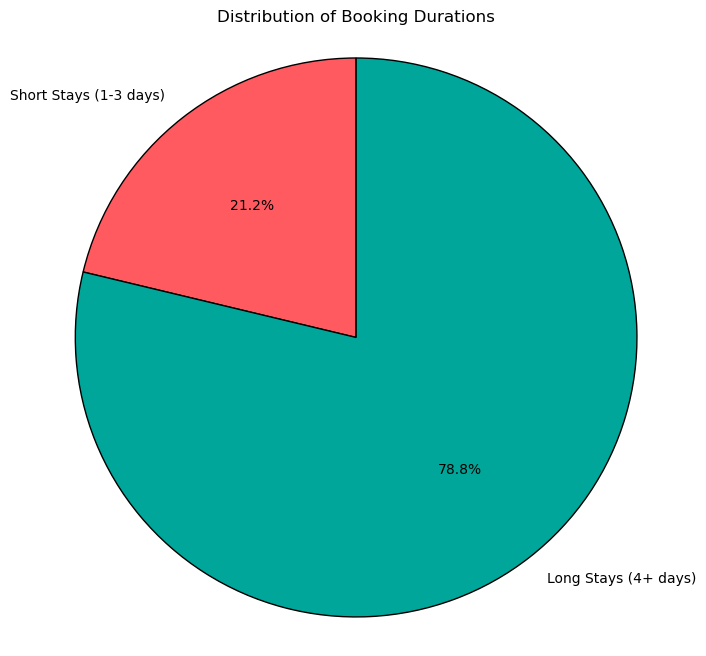

In [70]:
# Sample data: counts of short and long stays
short_stay_count = len(short_stays)
long_stay_count = len(long_stays)

# Data for the pie chart
labels = ['Short Stays (1-3 days)', 'Long Stays (4+ days)']
sizes = [short_stay_count, long_stay_count]
colors = ['#ff5a5f', '#00a699']  # Custom colors for better visualization

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of Booking Durations')
plt.show()

In [71]:
# Ensure date columns are in datetime format
bookings['check_in_date'] = pd.to_datetime(bookings['check_in_date'])
bookings['check_out_date'] = pd.to_datetime(bookings['check_out_date'])

# Calculate booking duration in days
bookings['duration'] = (bookings['check_out_date'] - bookings['check_in_date']).dt.days

# Segment the data
short_stays = bookings[bookings['duration'].between(1, 3)]
long_stays = bookings[bookings['duration'] >= 4]

# Function to perform A/B test
def ab_test(segment, segment_name):
    control = segment[segment['discount_applied'] == 0]
    treatment = segment[segment['discount_applied'] == 1]
    
    control_rate = len(control) / len(segment) * 100
    treatment_rate = len(treatment) / len(segment) * 100
    
    # Perform t-test on booking prices
    t_stat, p_value = stats.ttest_ind(control['booking_price'], treatment['booking_price'], equal_var=False)
    
    print(f'--- {segment_name} ---')
    print(f'Control Group Booking Rate: {control_rate:.2f}%')
    print(f'Treatment Group Booking Rate: {treatment_rate:.2f}%')
    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value: {p_value:.4f}')
    if p_value < 0.05:
        print('Statistically significant difference in booking amounts between control and treatment groups.\n')
    else:
        print('No statistically significant difference in booking amounts between control and treatment groups.\n')

# Perform A/B tests for each segment
ab_test(short_stays, 'Short Stays (1-3 days)')
ab_test(long_stays, 'Long Stays (4+ days)')


--- Short Stays (1-3 days) ---
Control Group Booking Rate: 51.06%
Treatment Group Booking Rate: 48.94%
T-statistic: 0.4569
P-value: 0.6478
No statistically significant difference in booking amounts between control and treatment groups.

--- Long Stays (4+ days) ---
Control Group Booking Rate: 49.94%
Treatment Group Booking Rate: 50.06%
T-statistic: 1.1297
P-value: 0.2586
No statistically significant difference in booking amounts between control and treatment groups.



In [72]:
bookings

,booking_id,check_in_date,check_out_date,num_guests,booking_price,discount_applied,payment_method,user_id,listing_id,stay_length,duration
0,1a02c1f5-3b30-4e71-8176-b7643c082b02,2024-10-20,2024-10-26,3,3579.30,0,PayPal,89e491f5-fa7c-4534-9ec7-dc869bec66b0,2e884c8e-ebb0-4af8-83a4-8cca906843a5,272,6
1,31b1787b-3d77-4a7d-97f8-edd4a6448be2,2024-10-13,2024-10-23,6,2267.00,1,PayPal,cc4549e5-47dd-4d3b-8899-1e00569a4025,NaN,254,10
2,eda91017-bad4-4569-8e07-d9e1c624fac6,2024-01-08,2024-01-18,9,732.66,1,PayPal,d120db52-98ca-4739-84b4-4c3867093412,b50ec8b1-6114-4165-ae3d-098058db7611,451,10
3,2eeb92d5-9f5d-4001-8bd4-b0c7bd158e3f,2024-10-25,2024-10-28,6,1545.54,1,Credit Card,a64b1e9d-a74b-41cf-905d-afebc5816065,35aca8b4-3a5e-41ba-a686-8ce2c9cb4aff,217,3
4,085d30c5-e1dc-4361-933c-b57ff68777ce,2024-11-14,2024-11-26,1,590.81,0,PayPal,8300eb2f-56c6-445e-a316-9c94566d6ac9,c84466a4-589b-4db8-9d48-17940dbcbed0,383,12
...,...,...,...,...,...,...,...,...,...,...,...
9781,4724a072-33b1-4e03-943d-c514e5b2a773,2024-03-27,2024-04-06,4,726.15,0,Bank Transfer,af33b4e7-1429-46b7-b055-b11a95760e41,30e067a3-f615-4431-a53e-f53aaa06d909,603,10
9782,19577da1-ce9f-4b71-abfd-e7cb8eaefa6e,2024-02-28,2024-03-13,2,969.88,0,PayPal,d9ebd049-e868-415e-94fc-062c8ca70d9e,253ab8b4-6f31-4b08-9b1b-d77aa8da0055,608,14
9783,ccc35d0f-2ca1-4a10-a31a-fc5b595ec4e9,2024-12-16,2024-12-25,6,3545.20,1,Credit Card,19e709c0-6173-4770-841b-8a8c1679ee19,7d3124ee-3baa-41a0-8530-914d59fb0d7a,119,9
9784,7cacf9d6-d25c-4da1-b133-8df72233ee3c,2024-02-14,2024-02-26,7,513.87,0,Bank Transfer,a0d62e8b-69b7-4583-a138-70728d7f7136,afc1be31-94af-4b2a-8a6c-290834173cc7,661,12


In [73]:
events

,Unnamed: 0,event_id,user_id,event_type,event_timestamp,listing_id,session_id
0,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29
1,4099.0,718f79bb-1eb7-4a10-8966-2fea40ea89b5,481cd3a7-3a17-4f73-a9dd-8c6bc48f7396,Search,6/7/24 21:08,96b21ad7-3280-42ac-af45-d8890fcd2af4,54676457-fcce-4ee0-b08c-f9a35fddc628
2,7206.0,9086eca1-377f-4f50-822c-c6f2d3678210,143f5ed9-7f37-43bf-a672-2687b2bbf6c0,Search,6/29/24 20:06,f0ab1ce4-ba0f-478a-bc11-e8463ed36d46,38e1f084-a209-41d9-b212-31c41ddcd512
3,1434.0,e4c8cb47-e8bc-4825-9812-81faa0de1dd8,2bf812e0-f1f9-4d9e-978c-c6b07c38102b,Search,7/20/24 15:06,f87e2b8b-c4a9-4cf4-9bf2-404d83b074c2,f907323c-a265-42f4-8044-29cf00e0301b
4,4494.0,731a9c54-5e36-4b01-ae48-5c49176346c5,80f82025-396f-4596-b842-dcb5fc59b16c,Search,8/16/24 13:35,5eb46618-8f47-4fe0-8da6-cd5b30094715,dd766f54-d3e4-403f-863f-b6ea809372d4
...,...,...,...,...,...,...,...
59801,NaN,missing_listing_event_5686,NaN,NaN,23:04.9,333324d0-6287-467d-936a-092e91334637,missing_session_5686
59802,NaN,missing_listing_event_5687,NaN,NaN,23:04.9,a9a8fc90-9c87-491d-9d19-5de5d71d7eea,missing_session_5687
59803,NaN,missing_listing_event_5688,NaN,NaN,23:04.9,30e067a3-f615-4431-a53e-f53aaa06d909,missing_session_5688
59804,NaN,missing_listing_event_5689,NaN,NaN,23:04.9,afc1be31-94af-4b2a-8a6c-290834173cc7,missing_session_5689


In [74]:
events_to_bookings = pd.merge(
    events,  # Replace with your bookings DataFrame
    bookings,    # Replace with your events DataFrame
    how="inner",
    left_on=["user_id", "listing_id"],
    right_on=["user_id", "listing_id"],
    suffixes=("_booking", "_event")  # To differentiate overlapping columns
)


In [75]:
events_to_bookings

,Unnamed: 0,event_id,user_id,event_type,event_timestamp,listing_id,session_id,booking_id,check_in_date,check_out_date,num_guests,booking_price,discount_applied,payment_method,stay_length,duration
0,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
1,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
2,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
3,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
4,6322.0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,NaN,missing_user_event_4084,8937adc5-2199-47f1-82e3-da128f19fe8e,NaN,23:04.9,NaN,missing_session_4084,f7471f46-95e7-488e-a435-b28aef5f6fc9,2024-02-13,2024-02-17,2,2319.16,0,Bank Transfer,413,4
51149,NaN,missing_user_event_4092,b0df263e-f35b-493e-a316-7f291a574c59,NaN,23:04.9,NaN,missing_session_4092,1b62786b-783f-462d-a3cd-2761dc969aec,2024-11-17,2024-11-30,8,1110.83,1,PayPal,115,13
51150,NaN,missing_user_event_4096,8272cda7-346f-4bbc-9f29-0f1d5fb51219,NaN,23:04.9,NaN,missing_session_4096,46fdd73c-99d0-4497-8937-d4bed7caa4b8,2024-08-18,2024-09-01,3,2140.54,0,Bank Transfer,231,14
51151,NaN,missing_user_event_4109,09ee9d21-7b84-4fe8-bb4a-d53355cec6ef,NaN,23:04.9,NaN,missing_session_4109,403e88df-903b-4ff3-b229-904d8369156e,2024-09-14,2024-09-27,3,4012.39,1,PayPal,400,13


In [76]:
# Drop the 'Unnamed: 0' column if it exists
events_to_bookings = events_to_bookings.drop(columns=['Unnamed: 0'], errors='ignore')

# Remove duplicate rows to make the dataset distinct
events_to_bookings = events_to_bookings.drop_duplicates()


In [77]:
events_to_bookings

,event_id,user_id,event_type,event_timestamp,listing_id,session_id,booking_id,check_in_date,check_out_date,num_guests,booking_price,discount_applied,payment_method,stay_length,duration
0,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Search,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
5,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,View Listing,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
6,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,Add to Wishlist,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
7,5794e3e3-67b4-4812-9da4-dd9707ca5d10,266df6c1-a3e9-409a-bc00-e3e82fcdb373,NaN,3/11/24 12:40,f44e7723-46a3-41a3-aada-0cddf5f8e192,82dba4be-91b6-420e-8b84-ada4c9e26b29,6ad91ebb-6a30-491c-a725-b5b66b1eb63e,2024-09-02,2024-09-15,3,2354.01,1,PayPal,156,13
22,718f79bb-1eb7-4a10-8966-2fea40ea89b5,481cd3a7-3a17-4f73-a9dd-8c6bc48f7396,Search,6/7/24 21:08,96b21ad7-3280-42ac-af45-d8890fcd2af4,54676457-fcce-4ee0-b08c-f9a35fddc628,51a7022f-2d10-48f2-93ab-cde2931a36f9,2024-08-03,2024-08-17,6,308.86,0,PayPal,257,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,missing_user_event_4084,8937adc5-2199-47f1-82e3-da128f19fe8e,NaN,23:04.9,NaN,missing_session_4084,f7471f46-95e7-488e-a435-b28aef5f6fc9,2024-02-13,2024-02-17,2,2319.16,0,Bank Transfer,413,4
51149,missing_user_event_4092,b0df263e-f35b-493e-a316-7f291a574c59,NaN,23:04.9,NaN,missing_session_4092,1b62786b-783f-462d-a3cd-2761dc969aec,2024-11-17,2024-11-30,8,1110.83,1,PayPal,115,13
51150,missing_user_event_4096,8272cda7-346f-4bbc-9f29-0f1d5fb51219,NaN,23:04.9,NaN,missing_session_4096,46fdd73c-99d0-4497-8937-d4bed7caa4b8,2024-08-18,2024-09-01,3,2140.54,0,Bank Transfer,231,14
51151,missing_user_event_4109,09ee9d21-7b84-4fe8-bb4a-d53355cec6ef,NaN,23:04.9,NaN,missing_session_4109,403e88df-903b-4ff3-b229-904d8369156e,2024-09-14,2024-09-27,3,4012.39,1,PayPal,400,13


# Discount Effect on Conversion Rates A/B Test

In [78]:
# Control group calculations
control_views = events_to_bookings[
    (events_to_bookings['discount_applied'] == 0) & (events_to_bookings['event_type'] == "View Listing")
]['user_id'].nunique()  # Count unique users who viewed listings

control_conversions = events_to_bookings[
    (events_to_bookings['discount_applied'] == 0) & (events_to_bookings['event_type'] == "Book")
]['user_id'].nunique()  # Count unique users who booked

# Treatment group calculations
treatment_views = events_to_bookings[
    (events_to_bookings['discount_applied'] == 1) & (events_to_bookings['event_type'] == "View Listing")
]['user_id'].nunique()  # Count unique users who viewed listings

treatment_conversions = events_to_bookings[
    (events_to_bookings['discount_applied'] == 1) & (events_to_bookings['event_type'] == "Book")
]['user_id'].nunique()  # Count unique users who booked

# Conversion rates
control_conversion_rate = control_conversions / control_views if control_views > 0 else 0
treatment_conversion_rate = treatment_conversions / treatment_views if treatment_views > 0 else 0

# Display results
print(f"Control Conversion Rate: {control_conversion_rate:.2%}")
print(f"Treatment Conversion Rate: {treatment_conversion_rate:.2%}")


Control Conversion Rate: 64.31%
Treatment Conversion Rate: 67.84%


In [79]:
from statsmodels.stats.power import GofChisquarePower
import math

# Define parameters
alpha = 0.05  # Significance level
power = 0.8  # Statistical power
baseline_conversion_rate = control_conversion_rate  # Control group conversion rate
mde = 0.02  # Minimum detectable effect (absolute difference in conversion rates)

# Calculate pooled probability under null hypothesis
pooled_prob = baseline_conversion_rate + mde / 2

# Calculate standard deviation under null hypothesis
std_dev = math.sqrt(pooled_prob * (1 - pooled_prob))

# Calculate z-scores for alpha and power
from scipy.stats import norm
z_alpha = norm.ppf(1 - alpha / 2)  # Two-tailed test
z_beta = norm.ppf(power)

# Calculate required sample size per group
sample_size_per_group = ((z_alpha + z_beta) ** 2 * std_dev ** 2) / mde ** 2
sample_size_per_group = math.ceil(sample_size_per_group)

print(f"Required sample size per group: {sample_size_per_group}")


Required sample size per group: 4446


In [80]:
from statsmodels.stats.proportion import proportions_ztest

# Define observed successes and sample sizes
successes = [control_conversions, treatment_conversions]
sample_sizes = [control_views, treatment_views]

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(successes, sample_sizes, alternative='two-sided')

# Display results
print(f"Control Conversion Rate: {control_conversion_rate:.2%}")
print(f"Treatment Conversion Rate: {treatment_conversion_rate:.2%}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")


Control Conversion Rate: 64.31%
Treatment Conversion Rate: 67.84%
Z-statistic: -1.7237
P-value: 0.0848
The difference in conversion rates is not statistically significant.


In [81]:
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Ensure date columns are in datetime format
events_to_bookings['check_in_date'] = pd.to_datetime(events_to_bookings['check_in_date'])
events_to_bookings['check_out_date'] = pd.to_datetime(events_to_bookings['check_out_date'])

# Calculate booking duration in days
events_to_bookings['duration'] = (events_to_bookings['check_out_date'] - events_to_bookings['check_in_date']).dt.days

# Segment the data
short_stays = events_to_bookings[events_to_bookings['duration'].between(1, 3)]
long_stays = events_to_bookings[events_to_bookings['duration'] >= 4]

# Function to calculate conversion rates and perform A/B test for each segment
def ab_test(segment, segment_name):
    control_views = segment[
        (segment['discount_applied'] == 0) & (segment['event_type'] == "View Listing")
    ]['user_id'].nunique()
    control_conversions = segment[
        (segment['discount_applied'] == 0) & (segment['event_type'] == "Book")
    ]['user_id'].nunique()
    treatment_views = segment[
        (segment['discount_applied'] == 1) & (segment['event_type'] == "View Listing")
    ]['user_id'].nunique()
    treatment_conversions = segment[
        (segment['discount_applied'] == 1) & (segment['event_type'] == "Book")
    ]['user_id'].nunique()
    
    control_conversion_rate = control_conversions / control_views if control_views > 0 else 0
    treatment_conversion_rate = treatment_conversions / treatment_views if treatment_views > 0 else 0
    
    # Perform two-proportion z-test
    successes = [control_conversions, treatment_conversions]
    sample_sizes = [control_views, treatment_views]
    z_stat, p_value = proportions_ztest(successes, sample_sizes, alternative='two-sided')
    
    # Display results
    print(f"--- {segment_name} ---")
    print(f"Control Conversion Rate: {control_conversion_rate:.2%}")
    print(f"Treatment Conversion Rate: {treatment_conversion_rate:.2%}")
    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("The difference in conversion rates is statistically significant.\n")
    else:
        print("The difference in conversion rates is not statistically significant.\n")

# Perform A/B tests for each segment
ab_test(short_stays, 'Short Stays (1-3 days)')
ab_test(long_stays, 'Long Stays (4+ days)')


--- Short Stays (1-3 days) ---
Control Conversion Rate: 61.22%
Treatment Conversion Rate: 67.93%
Z-statistic: -1.5660
P-value: 0.1173
The difference in conversion rates is not statistically significant.

--- Long Stays (4+ days) ---
Control Conversion Rate: 64.45%
Treatment Conversion Rate: 66.41%
Z-statistic: -0.8555
P-value: 0.3923
The difference in conversion rates is not statistically significant.



# Clustering Analysis of Users

In [114]:
data = pd.read_csv("/Users/andreaseet/Downloads/Data Science/Airbnb/airbnb_clustering_new.csv")

In [115]:
data

,user_id,booking_price,stay_length,num_guests,price_per_night,num_bookings,amenities_1,amenities_2,amenities_3,amenities_4,...,amenities_6,amenities_7,amenities_8,amenities_9,amenities_10,used_discount,active_days,check_in_date,check_out_date,cluster
0,user_2,800.000000,1,3,250.000000,8.0,1,1,1,1,...,1,1,1,1,1,Yes,71.0,1/2/23,1/3/23,0
1,user_53,700.000000,1,2,250.000000,9.0,1,1,1,1,...,1,1,1,1,1,Yes,1.0,1/2/23,1/3/23,0
2,user_59,500.000000,1,2,250.000000,10.0,1,1,1,1,...,1,1,1,1,1,Yes,3.0,1/2/23,1/3/23,0
3,user_68,2300.000000,1,2,250.000000,8.0,1,1,1,1,...,1,1,1,1,1,Yes,10.0,1/2/23,1/3/23,0
4,user_76,100.000000,1,4,250.000000,9.0,1,1,1,1,...,1,1,1,1,1,Yes,7.0,1/2/23,1/3/23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,user_4906,122.762549,12,1,91.652092,1.0,0,0,0,1,...,0,0,1,0,0,No,30.0,6/6/36,6/18/36,3
4996,user_4922,382.067496,5,1,185.835825,1.0,1,1,0,0,...,0,1,0,1,1,No,12.0,6/22/36,6/27/36,3
4997,user_4932,203.959670,7,1,96.990118,1.0,1,1,0,1,...,0,1,1,1,0,No,5.0,7/2/36,7/9/36,3
4998,user_4973,286.272203,1,1,180.428383,1.0,0,1,0,1,...,1,0,0,0,0,No,16.8,8/12/36,8/13/36,3


In [116]:
data['amenity_count'] = data.loc[:, 'amenities_1':'amenities_10'].sum(axis=1)

data['check_in_date'] = pd.to_datetime(data['check_in_date'])
data['check_out_date'] = pd.to_datetime(data['check_out_date'])

# Calculate the length of stay in days
data['stay_length'] = (data['check_out_date'] - data['check_in_date']).dt.days


# Categorize the 'active_days' into categories
bins = [0, 7, 30, 60, float('inf')]  # Bin edges
labels = [1, 2, 3, 4]  # Corresponding categories

data['stay_length_cat'] = pd.cut(data['stay_length'], bins=bins, labels=labels, right=True)


In [117]:
# Categorize the 'active_days' into categories
bins = [0, 100, 200, float('inf')]  # Bin edges
labels = [1, 2, 3]  # Corresponding categories

data['price_category'] = pd.cut(data['price_per_night'], bins=bins, labels=labels, right=True)


In [118]:
# Categorize the 'active_days' into categories
bins = [0, 7, 30, 60, float('inf')]  # Bin edges
labels = [1, 2, 3, 4]  # Corresponding categories

data['active_days_category'] = pd.cut(data['active_days'], bins=bins, labels=labels, right=True)


In [119]:
data['used_discount_binary'] = data['used_discount'].map({'Yes': 1, 'No': 0})


In [120]:
data

,user_id,booking_price,stay_length,num_guests,price_per_night,num_bookings,amenities_1,amenities_2,amenities_3,amenities_4,...,used_discount,active_days,check_in_date,check_out_date,cluster,amenity_count,stay_length_cat,price_category,active_days_category,used_discount_binary
0,user_2,800.000000,1,3,250.000000,8.0,1,1,1,1,...,Yes,71.0,2023-01-02,2023-01-03,0,10,1,3,4,1
1,user_53,700.000000,1,2,250.000000,9.0,1,1,1,1,...,Yes,1.0,2023-01-02,2023-01-03,0,10,1,3,1,1
2,user_59,500.000000,1,2,250.000000,10.0,1,1,1,1,...,Yes,3.0,2023-01-02,2023-01-03,0,10,1,3,1,1
3,user_68,2300.000000,1,2,250.000000,8.0,1,1,1,1,...,Yes,10.0,2023-01-02,2023-01-03,0,10,1,3,2,1
4,user_76,100.000000,1,4,250.000000,9.0,1,1,1,1,...,Yes,7.0,2023-01-02,2023-01-03,0,10,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,user_4906,122.762549,12,1,91.652092,1.0,0,0,0,1,...,No,30.0,2036-06-06,2036-06-18,3,2,2,1,2,0
4996,user_4922,382.067496,5,1,185.835825,1.0,1,1,0,0,...,No,12.0,2036-06-22,2036-06-27,3,5,1,2,2,0
4997,user_4932,203.959670,7,1,96.990118,1.0,1,1,0,1,...,No,5.0,2036-07-02,2036-07-09,3,7,1,1,1,0
4998,user_4973,286.272203,1,1,180.428383,1.0,0,1,0,1,...,No,16.8,2036-08-12,2036-08-13,3,4,1,2,2,0


In [121]:

# Normalization
scaler = StandardScaler()
features = ['amenity_count', 'booking_price', 'num_guests', 'stay_length', 'num_guests', 'num_bookings', 'active_days_category', 'used_discount_binary']
scaled_features = scaler.fit_transform(data[features])


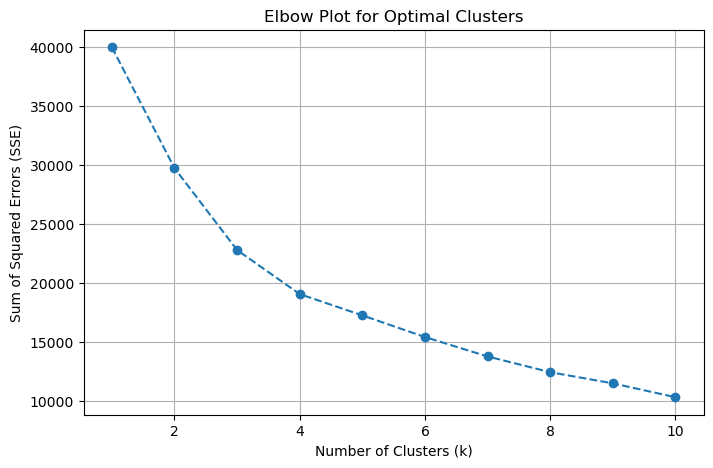

In [122]:

# Elbow plot to find optimal number of clusters
sse = []  # Sum of squared errors
k_range = range(1, 11)  # Check 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)  # Store the inertia (SSE)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid()
plt.show()

In [123]:
# Applying KMeans for 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the cluster characteristics
cluster_summary = data.groupby('cluster')[['amenity_count', 'booking_price', 'num_guests', 'stay_length',  'num_bookings', 'active_days_category', 'used_discount_binary']].mean()

# Display the cluster summary
print(cluster_summary)

         amenity_count  booking_price  num_guests  stay_length  num_bookings  \
cluster                                                                        
0             4.674753     160.952978    1.730458    91.000000      6.377358   
1             1.320826     244.272888    3.541745     3.166979      6.660178   
2             9.510917     482.759563    2.522562     3.266376      4.200873   
3             1.604869     160.396590    1.398876     5.637640      5.887640   

         used_discount_binary  
cluster                        
0                    0.775382  
1                    0.257974  
2                    0.908297  
3                    0.446629  


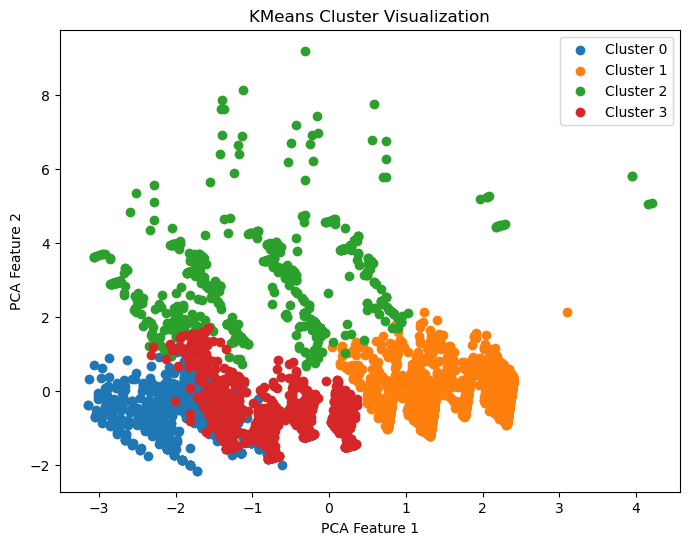

In [124]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Assign cluster labels from KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = reduced_features[data['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('KMeans Cluster Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [125]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(scaled_features, data['cluster'])

# Display the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3350384015445761


In [126]:
# Applying KMeans for 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the cluster characteristics
cluster_summary = data.groupby('cluster')[['amenity_count', 'booking_price', 'num_guests', 'stay_length',  'num_bookings', 'active_days_category', 'used_discount_binary']].mean()

# Display the cluster summary
print(cluster_summary)

         amenity_count  booking_price  num_guests  stay_length  num_bookings  \
cluster                                                                        
0             4.674753     160.952978    1.730458    91.000000      6.377358   
1             1.320826     244.272888    3.541745     3.166979      6.660178   
2             9.510917     482.759563    2.522562     3.266376      4.200873   
3             1.604869     160.396590    1.398876     5.637640      5.887640   

         used_discount_binary  
cluster                        
0                    0.775382  
1                    0.257974  
2                    0.908297  
3                    0.446629  


# Clustering Analysis Report: Silhouette Score and Next Steps

## Understanding the Silhouette Score
The clustering analysis yielded a silhouette score of 0.303. While this score indicates moderate cluster cohesion and separation, it can still provide meaningful insights in the business context of Airbnb guest segmentation. Clusters with moderate silhouette scores can highlight patterns that align with actionable guest personas, such as identifying groups of budget-conscious travelers (cluster 2) or guests who prefer more amenities and prefer higher bookings (cluster 3). Even with a suboptimal silhouette score, the derived clusters may inform marketing strategies, pricing models, and operational decisions that add significant business value.

## Business Relevance of the Current Clusters
In the current analysis, the identified clusters already provide insights into guest preferences based on key features like booking price, stay length, and amenity usage. For example, distinguishing guests who book with more people (cluster 0), who book longer stays at lower prices (cluster 1), and those opting for high-amenity, short-term luxury accommodations (cluster 3) can help tailor Airbnb's promotions and personalize recommendations.

## Next Steps to Improve Clustering
To improve cluster quality and increase the business relevance of the analysis, additional features that capture nuanced guest behavior and contextual information should be incorporated. These features will provide a richer dataset, allowing for more meaningful clustering results. 

### Potential Features to Add
1. **Regional Pricing Trends**:
   - Captures the impact of location-specific pricing dynamics on guest preferences.
   - Helps identify clusters of guests who prefer budget-friendly versus high-priced regions.

2. **Seasonality and Special Discounts**:
   - Tracks booking behavior during holidays or peak seasons.
   - Provides insights into guests' responsiveness to seasonal discounts.

3. **Guest Behavior Features**:
   - **Booking Lead Time**: Measures how far in advance a guest books, offering insights into planning habits.
   - **Cancellation Rate**: Indicates how likely a guest is to cancel, highlighting reliability.
   - **Repeat Booking Indicator**: Differentiates between first-time and loyal customers.
   - **Booking Frequency**: Tracks how often a guest books (e.g., monthly, yearly), identifying frequent users. We currently have number of bookings, however, categorizing into monthly and yearly could be helpful.


4. **Geographic Features**:
   - **Region of Stay**: Categorizes regions (e.g., urban, rural, international) to explore location preferences.
   - **Average Destination Rating**: Reflects guest preferences for highly rated properties.
   - **Distance from Airport**: Assesses proximity to transit hubs, relevant for business or convenience-focused guests.

5. **Property Preferences**:
   - **Amenity Diversity**: Counts unique amenities used, indicating specific guest needs. Currently, we did not look into the types of amentities that each cluster uses.
   - **Luxury Preference**: Measures the proportion of bookings in high-price-category listings.
   - **Host Interaction**: Highlights whether guests prefer properties with personal host interaction or automated check-ins.
   - **Property Size**: Tracks average bedrooms in booked properties to infer group sizes.
   - **Listing Age**: Identifies whether guests lean toward newer or older listings.




## Proposed Actions

Incorporating these features will enhance the richness of the dataset and refine the clustering model, leading to:
- Improved differentiation between guest types.
- More actionable insights for personalized marketing campaigns.
- Enhanced operational strategies for managing inventory and pricing.


A follow-up step would be to engineer these features, evaluate their impact on cluster quality, and re-run the clustering analysis. A higher silhouette score and better-defined clusters are expected with these additional dimensions, aligning even more closely with Airbnb's business goals.

In addition to refining the model, we could use these insights to improve the personalization of guest experiences based on the clusters.


# Personalizing Guest Experiences

## 1. Tailored Property Suggestions
- **Cluster 0 - Long-Stay Guests**: Promote homes with long-stay discounts and amenities like kitchens and laundry. Group Travelers**: Recommend large-capacity properties.
- **Cluster 1 - Budget Travelers**: Highlight affordable listings and discounts.
- **Cluster 2 - Long-Stay Guests**: Promote homes with long-stay discounts and amenities like kitchens and laundry.
- **Cluster 3 - Luxury Seekers**: Focus on high-end properties with premium features like pools and hot tubs.

## 2. Enhanced Search Filters
- Add options for amenities, group-friendly features, and price preferences.

## 3. Seasonal Offers
- Run discounts for budget travelers in off-peak seasons and luxury campaigns during holidays.

## 4. Loyalty Rewards
- Reward long-stay bookings and frequent luxury travelers with exclusive perks.

Personalizing recommendations based on guest preferences will boost satisfaction and bookings.

